#Data Analysis of SAT NYC Scores (2014-2015)
[Kaggle Database](https://www.kaggle.com/nycopendata/high-schools)

In our analysis of the data from the Kaggle dataset above, we are looking for any trends or patterns reflected within the data associated with SAT scores from each High School within the NYC area. In particular, we are focusing on the possible demographic and social mechanisms that may be at work and how they affect standarized testing.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
NYC= pd.read_csv('scores.csv')
NYC.head()

School ID  ... Percent Tested
0    02M260  ...            NaN
1    06M211  ...            NaN
2    01M539  ...          91.0%
3    02M294  ...          78.9%
4    02M308  ...          65.1%

[5 rows x 22 columns]

In [0]:
#Only look at entries where schools have taken the SAT 
NYC_cleaned = NYC.dropna()
NYC_cleaned.head()

School ID  ... Percent Tested
2    01M539  ...          91.0%
3    02M294  ...          78.9%
4    02M308  ...          65.1%
5    02M545  ...          95.9%
6    01M292  ...          59.7%

[5 rows x 22 columns]

In [0]:
#Create a cumulative score column
NYC_cleaned['Average Cumulative Score (SAT)'] = NYC_cleaned.iloc[:, 18:21].sum(axis = 1)
NYC_cleaned.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


School ID  ... Average Cumulative Score (SAT)
2    01M539  ...                         1859.0
3    02M294  ...                         1193.0
4    02M308  ...                         1261.0
5    02M545  ...                         1529.0
6    01M292  ...                         1197.0

[5 rows x 23 columns]

In [0]:
#Change values from string to float
NYC_cleaned['Percent White'] = pd.to_numeric(NYC_cleaned['Percent White'].str.replace("%",""))
NYC_cleaned['Percent Black'] = pd.to_numeric(NYC_cleaned['Percent Black'].str.replace("%",""))
NYC_cleaned['Percent Hispanic'] = pd.to_numeric(NYC_cleaned['Percent Hispanic'].str.replace("%",""))
NYC_cleaned['Percent Asian'] = pd.to_numeric(NYC_cleaned['Percent Asian'].str.replace("%",""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
#Find the largest demographic of each school
# Not working corrrectly right now, for some reason some rows are showing the incorrect result
def demographic(df):
  if (df.max() == df[0]):
    return "White"
  if (df.max() == df[1]):
    return "Black"
  if (df.max() == df[2]):
    return "Hispanic"
  if (df.max() == df[3]):
    return "Asian"



NYC_cleaned['Largest Demographic'] = NYC_cleaned[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']].apply(demographic, axis = 1)
NYC_cleaned.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


School ID  ... Largest Demographic
2    01M539  ...               Asian
3    02M294  ...            Hispanic
4    02M308  ...            Hispanic
5    02M545  ...               Asian
6    01M292  ...            Hispanic

[5 rows x 24 columns]

In [0]:
#Showing only "Borough", "Student Enrollment", and "Average Cumulative Score" columns as the next two graph will be looking at those statistics
NYC_Borough=NYC_cleaned[['Borough','Student Enrollment','Average Cumulative Score (SAT)']]
print(NYC_Borough)

       Borough  Student Enrollment  Average Cumulative Score (SAT)
2    Manhattan              1735.0                          1859.0
3    Manhattan               358.0                          1193.0
4    Manhattan               383.0                          1261.0
5    Manhattan               416.0                          1529.0
6    Manhattan               255.0                          1197.0
..         ...                 ...                             ...
430     Queens               381.0                          1086.0
431     Queens               368.0                          1114.0
432     Queens               683.0                          1280.0
433     Queens               397.0                          1207.0
434     Queens              1302.0                          1716.0

[374 rows x 3 columns]


In [0]:
#Renaming columns so they are one word each (easier to type out)
NYC_Borough.rename(columns = {'Average Cumulative Score (SAT)':'Average'}, inplace= True)
NYC_Borough.rename(columns = {'Student Enrollment':'Enrollment'}, inplace= True)
print(NYC_Borough)

       Borough  Enrollment  Average
2    Manhattan      1735.0   1859.0
3    Manhattan       358.0   1193.0
4    Manhattan       383.0   1261.0
5    Manhattan       416.0   1529.0
6    Manhattan       255.0   1197.0
..         ...         ...      ...
430     Queens       381.0   1086.0
431     Queens       368.0   1114.0
432     Queens       683.0   1280.0
433     Queens       397.0   1207.0
434     Queens      1302.0   1716.0

[374 rows x 3 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


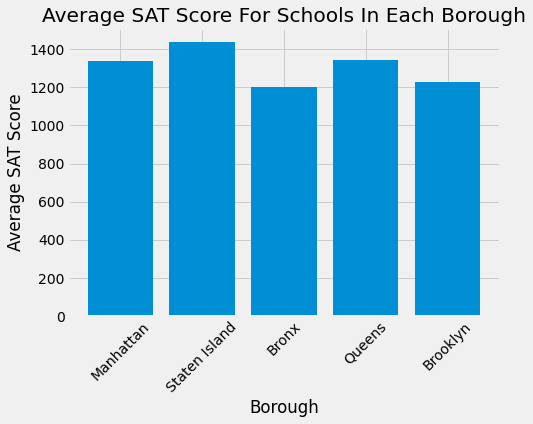

In [0]:
#Calculating and labeling the average score from each borough
Man=NYC_Borough[NYC_Borough['Borough'] == 'Manhattan']['Average'].mean()
Stat=NYC_Borough[NYC_Borough['Borough'] == 'Staten Island']['Average'].mean()
Bronx=NYC_Borough[NYC_Borough['Borough'] == 'Bronx']['Average'].mean()
Queen=NYC_Borough[NYC_Borough['Borough'] == 'Queens']['Average'].mean()
Brook=NYC_Borough[NYC_Borough['Borough'] == 'Brooklyn']['Average'].mean()

#Charting a Bar graph to show the Average SAT scores of every school within each borough
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
boroughs = ['Manhattan', 'Staten Island', 'Bronx', 'Queens', 'Brooklyn']
average = [Man,Stat,Bronx,Queen,Brook]
ax.bar(boroughs,average)
plt.xlabel('Borough')
plt.ylabel('Average SAT Score')
plt.title('Average SAT Score For Schools In Each Borough')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Avg. SAT score vs. Student Enrollment at individual schools')

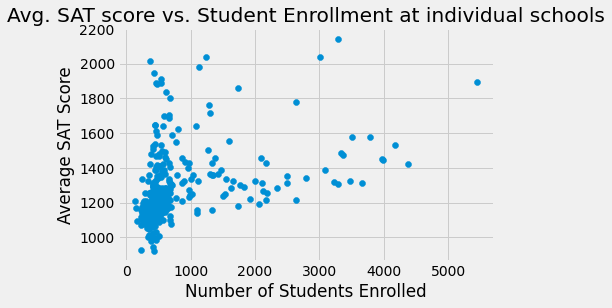

In [0]:
#Making Scatter Plot to compare Student Enrollment at a school to Average SAT score.

plt.scatter(x=NYC_Borough.Enrollment, y=NYC_Borough.Average)
plt.xlabel('Number of Students Enrolled')
plt.ylabel('Average SAT Score')
plt.title('Avg. SAT score vs. Student Enrollment at individual schools')

Text(0.5, 1.0, 'Majority Racial Makeup of Schools and SAT Score')

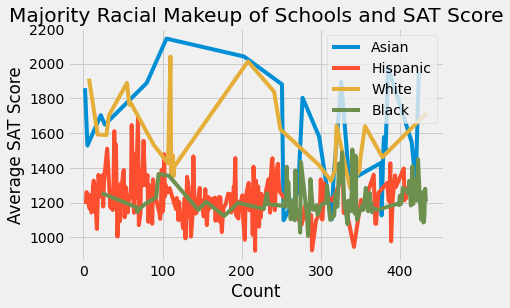

In [0]:
#comparing racial demographic to SAT scores
demog=NYC_cleaned[['Average Cumulative Score (SAT)','Largest Demographic']]
asian= demog[demog['Largest Demographic']=='Asian']['Average Cumulative Score (SAT)']
hispanic= demog[demog['Largest Demographic']=='Hispanic']['Average Cumulative Score (SAT)']
white= demog[demog['Largest Demographic']=='White']['Average Cumulative Score (SAT)']
black= demog[demog['Largest Demographic']=='Black']['Average Cumulative Score (SAT)']

#plotting
asian.plot(label="Asian")
hispanic.plot(label='Hispanic')
white.plot(label='White')
black.plot(label="Black")
plt.legend()
plt.xlabel('Count')
plt.ylabel("Average SAT Score")
plt.title("Majority Racial Makeup of Schools and SAT Score")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Average SAT Score of a NYC High School vs. How Many Students Took it')

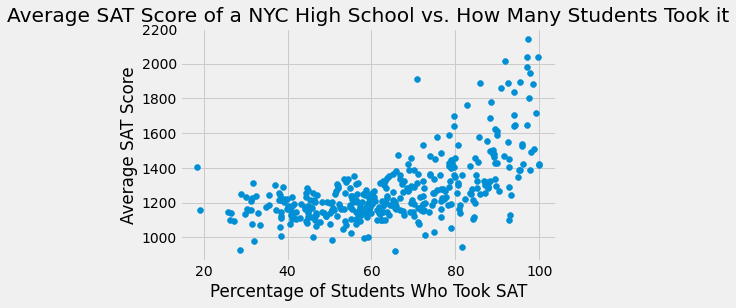

In [0]:
#how many people took the test in relation to how the school scored on the SAT
tested=NYC_cleaned[['Percent Tested','Average Cumulative Score (SAT)']]
tested['Percent Tested'] = tested["Percent Tested"].str.replace("%","").astype(float)
plt.scatter(tested['Percent Tested'], tested["Average Cumulative Score (SAT)"] )
plt.xlabel("Percentage of Students Who Took SAT")
plt.ylabel("Average SAT Score")
plt.title("Average SAT Score of a NYC High School vs. How Many Students Took it")
#schools with more students performed better on the SAT

#Chloropeth of Average SAT Scores within NYC Neighborhoods

In [0]:
!pip install folium --upgrade

     |████████████████████████████████| 92kB 1.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.10.1 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [0]:
!pip install geopandas

     |████████████████████████████████| 931kB 1.4MB/s 
     |████████████████████████████████| 14.7MB 2.1MB/s 
     |████████████████████████████████| 10.4MB 40.3MB/s 


In [0]:
!apt install libspatialindex-dev
!pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 2s (234 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [0]:
import folium
import json
import os
import geopandas

In [0]:
geo_json_data = json.load(open("nyc_neighborhoods.json"))

In [0]:
nyc_df = geopandas.read_file('nyc_neighborhoods.json')
gdf = geopandas.GeoDataFrame(NYC_cleaned, geometry = geopandas.points_from_xy(NYC_cleaned.Longitude, NYC_cleaned.Latitude), crs = {'init': 'epsg:4326'})


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [0]:
merged_data = geopandas.sjoin(nyc_df, gdf, how = "inner", op = "intersects")
merged_data.head()

/usr/local/lib/python3.6/dist-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:4326 != +init=epsg:4326 +type=crs)
  "(%s != %s)" % (left_df.crs, right_df.crs)


neighborhood boroughCode  ... Average Cumulative Score (SAT) Largest Demographic
0     Allerton           2  ...                         1286.0            Hispanic
0     Allerton           2  ...                         1407.0            Hispanic
0     Allerton           2  ...                         1248.0            Hispanic
0     Allerton           2  ...                         1278.0            Hispanic
0     Allerton           2  ...                         1016.0            Hispanic

[5 rows x 30 columns]

In [0]:
chloro_data =  pd.DataFrame(merged_data.groupby(["neighborhood"])["Average Cumulative Score (SAT)"].mean()).reset_index()

In [0]:
nyc_map = folium.Map(location=[40.7639, -73.9794], zoom_start = 13)
folium.Choropleth(
    geo_data=geo_json_data,
    data= chloro_data,
    columns=['neighborhood'	, 'Average Cumulative Score (SAT)'],
    key_on='feature.properties.neighborhood',
    fill_color='YlGn'
).add_to(nyc_map)

nyc_map

The purpose of this chloropeth map was to help visualize any clusters within the distribution of the average cumulative SAT scores. A noticeable pattern is that neighborhoods that are close in proximity to one another tend to have the same distribution of SAT scores. Let's look at other categories and see if this pattern is consistent.

#Chloropeth for SAT Math Scores

In [0]:
chloro_data =  pd.DataFrame(merged_data.groupby(["neighborhood"])["Average Score (SAT Math)"].mean()).reset_index()

In [0]:
nyc_map = folium.Map(location=[40.7639, -73.9794], zoom_start = 13)
folium.Choropleth(
    geo_data=geo_json_data,
    data= chloro_data,
    columns=['neighborhood'	, 'Average Score (SAT Math)'],
    key_on='feature.properties.neighborhood',
    fill_color='YlGn'
).add_to(nyc_map)

nyc_map

#Chloropeth of SAT Reading Scores

In [0]:
chloro_data =  pd.DataFrame(merged_data.groupby(["neighborhood"])["Average Score (SAT Reading)"].mean()).reset_index()

In [0]:
nyc_map = folium.Map(location=[40.7639, -73.9794], zoom_start = 13)
folium.Choropleth(
    geo_data=geo_json_data,
    data= chloro_data,
    columns=['neighborhood'	, 'Average Score (SAT Reading)'],
    key_on='feature.properties.neighborhood',
    fill_color='YlGn'
).add_to(nyc_map)

nyc_map

#Chloropeth of SAT Writing Scores

In [0]:
chloro_data =  pd.DataFrame(merged_data.groupby(["neighborhood"])["Average Score (SAT Writing)"].mean()).reset_index()

In [0]:
nyc_map = folium.Map(location=[40.7639, -73.9794], zoom_start = 13)
folium.Choropleth(
    geo_data=geo_json_data,
    data= chloro_data,
    columns=['neighborhood'	, 'Average Score (SAT Writing)'],
    key_on='feature.properties.neighborhood',
    fill_color='YlGn'
).add_to(nyc_map)

nyc_map

When breaking down the cumulative score down to its three components, we can see a far greater variability in scores from neighborhood to neighborhood. A possible explanation for this is that some schools may be focused more on certain subsections of the SAT than other schools. It is also possible that the resources and staff within those schools may be tailored towards specialization rather than focused on teaching the material for the SAT in a broad sense